## Handling Missing Values using Simple Imputer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [6]:
df = pd.read_csv("E:/Python and ML/Dataset/titanic_toy.csv")

In [7]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [10]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [11]:
X = df.drop(columns = ["Survived"])
Y = df["Survived"]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [14]:
X_train.shape ,X_test.shape

((712, 3), (179, 3))

In [19]:
mean_age = X_train["Age"].mean()
median_age = X_train["Age"].median()

mean_fare = X_train["Fare"].mean()
median_fare = X_train["Fare"].median()

In [20]:
X_train["Age_Median"] = X_train["Age"].fillna(median_age)
X_train["Age_Mean"] = X_train["Age"].fillna(mean_age)

X_train["Fare_Median"] = X_train["Fare"].fillna(median_fare)
X_train["Fare_Mean"] = X_train["Fare"].fillna(mean_fare)



In [21]:
X_train.sample(5)

,Age,Fare,Family,Age_Median,Age_Mean,Fare_Median,Fare_Mean
235,NaN,7.5500,0,28.75,29.785904,7.5500,7.5500
819,10.0,27.9000,5,10.00,10.000000,27.9000,27.9000
519,32.0,7.8958,0,32.00,32.000000,7.8958,7.8958
9,14.0,30.0708,1,14.00,14.000000,30.0708,30.0708
407,3.0,18.7500,2,3.00,3.000000,18.7500,18.7500


In [22]:
print("Original Age variable variance : ", X_train["Age"].var())
print("Age Variance after median imputation : ", X_train["Age_Median"].var())
print("Age Variance after mean imputation : ", X_train["Age_Mean"].var())


print("Original Fare variable variance : ", X_train["Fare"].var())
print("Fare Variance after median imputation : ", X_train["Fare_Median"].var())
print("Fare Variance after mean imputation : ", X_train["Fare_Mean"].var())

Original Age variable variance :  204.34951339046142
Age Variance after median imputation :  161.98956633460548
Age Variance after mean imputation :  161.81262452718676
Original Fare variable variance :  2448.1979137063163
Fare Variance after median imputation :  2340.09102197536
Fare Variance after mean imputation :  2324.2385256705534


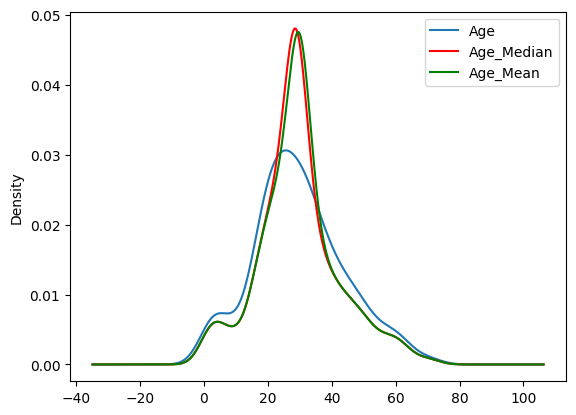

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original variables distribution
X_train["Age"].plot(kind = "kde", ax = ax)

# Variable imputed with the median
X_train["Age_Median"].plot(kind = "kde", ax= ax , color = "red")

#Variable imputed with the mean
X_train["Age_Mean"].plot(kind = "kde", ax= ax , color = "green")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc= "best")

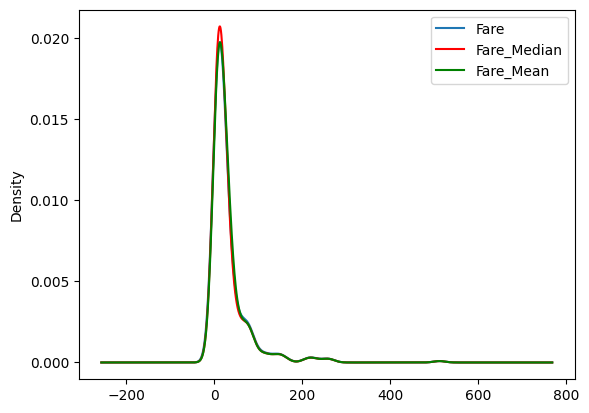

In [27]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_Median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_Mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [28]:
X_train.cov()

,Age,Fare,Family,Age_Median,Age_Mean,Fare_Median,Fare_Mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_Median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_Mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_Median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_Mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [29]:
X_train.corr()

,Age,Fare,Family,Age_Median,Age_Mean,Fare_Median,Fare_Mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_Median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_Mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_Median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_Mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

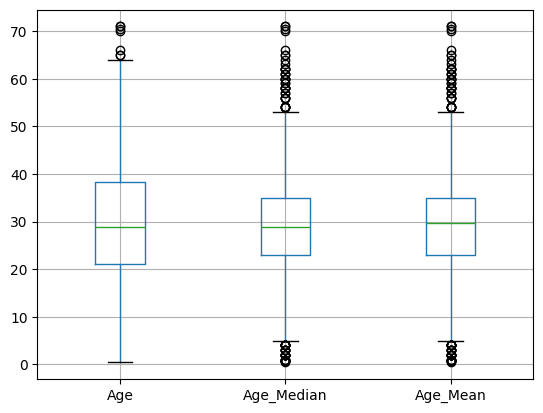

In [30]:
X_train[["Age", "Age_Median", "Age_Mean"]].boxplot()

<Axes: >

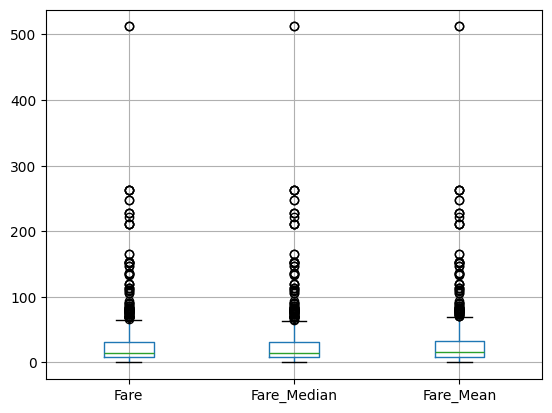

In [32]:
X_train[['Fare', 'Fare_Median', 'Fare_Mean']].boxplot()

### Using Sklean

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [34]:
imputer1 = SimpleImputer(strategy="median")
imputer2 = SimpleImputer(strategy="mean")


In [35]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ["Age"]),
    ('imputer2', imputer2, ["Fare"])
], remainder= "passthrough")

In [36]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [38]:
trf.named_transformers_['imputer1'].statistics_

# This line returns the median value calculated by the SimpleImputer (with strategy="median") for the "Age" column during fitting.

#It shows the value that will be used to fill missing values in "Age" when you transform your data.

array([28.75])

In [40]:
trf.named_transformers_["imputer2"].statistics_

array([32.61759689])

In [41]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [42]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]], shape=(712, 3))